# Deep Learning : Assignment 1 
# Image Classification and Regression
## Attyasse Flora  
### Master DSBA

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72


In [2]:

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_rectangle_denoise(noise=0.0, free_location=False):
    figsize = 1.0
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize / 2 + side / 2
        bottom = figsize / 2 - side / 2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing_denoise(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]




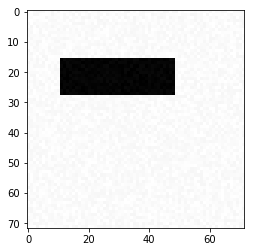

In [3]:

im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


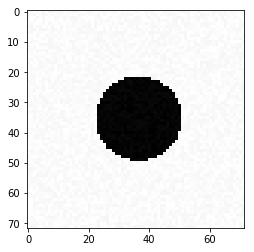

In [4]:

im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


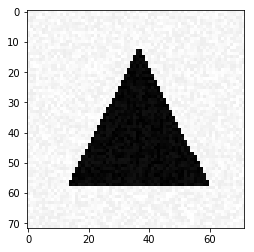

In [5]:

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


In [6]:

def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

In [7]:
import matplotlib.patches as patches


In [8]:
def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]

In [9]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [10]:
X_train.shape, Y_train.shape

((300, 5184), (300,))

# 3. Simple Classification 

In [11]:
n_cols=X_train.shape[1]
n_cols

5184

In [12]:
# Import necessary modules

from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.utils import to_categorical, normalize
from keras.optimizers import SGD
from keras import optimizers



Using TensorFlow backend.


with Stochastic gradient descent optimizer

In [13]:
# Convert the Y_train to categorical: Y_train_cat
Y_train_cat =to_categorical(Y_train)

In [14]:

# Set up the model
sgd_model = Sequential()
sgd_model.add(Dense(3, kernel_initializer='uniform', input_shape=(n_cols,))) 
sgd_model.add(Activation('softmax'))

sgd = SGD(lr=0.001,decay=1e-5, momentum=0.6,nesterov=True)
sgd_model.compile(loss='categorical_crossentropy',optimizer=sgd, metrics=['accuracy'])
sgd_model.fit(X_train, Y_train_cat, epochs=15, validation_split=0.2)


Train on 240 samples, validate on 60 samples
Epoch 1/15
240/240 [==============================] - 0s 957us/step - loss: 1.0432 - acc: 0.4958 - val_loss: 1.1368 - val_acc: 0.5667
Epoch 2/15
240/240 [==============================] - 0s 180us/step - loss: 0.8118 - acc: 0.6750 - val_loss: 0.8013 - val_acc: 0.7833
Epoch 3/15
240/240 [==============================] - 0s 179us/step - loss: 0.7003 - acc: 0.7583 - val_loss: 0.7733 - val_acc: 0.6333
Epoch 4/15
240/240 [==============================] - 0s 178us/step - loss: 0.7073 - acc: 0.6750 - val_loss: 0.9200 - val_acc: 0.7333
Epoch 5/15
240/240 [==============================] - 0s 177us/step - loss: 0.6185 - acc: 0.8083 - val_loss: 0.6504 - val_acc: 0.8167
Epoch 6/15
240/240 [==============================] - 0s 180us/step - loss: 0.5634 - acc: 0.8250 - val_loss: 0.6442 - val_acc: 0.8167
Epoch 7/15
240/240 [==============================] - 0s 178us/step - loss: 0.5263 - acc: 0.8458 - val_loss: 0.6316 - val_acc: 0.8000
Epoch 8/15
240/24

In [15]:
Y_train_cat.shape

(300, 3)

the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.80 (or 80%) on the training data.

In [16]:
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
sgd_model.predict(X_test)

array([[0., 1., 0.]], dtype=float32)

In [17]:
predictions=sgd_model.predict(X_test)
predictions[0]
np.argmax(predictions[0])

1

In [18]:
Y_train_cat[0]

array([0., 1., 0.], dtype=float32)

so we predict a 1 and the real value is 0 , so our prediction is not good

 with Adam optimizer

In [19]:
adam_model = Sequential()
adam_model.add(Dense(3, kernel_initializer='uniform', input_shape=(n_cols,))) 
adam_model.add(Activation('softmax'))  

adam_model.compile(optimizer='adam', 
           loss='categorical_crossentropy', 
            metrics=['accuracy'])
adam_model.fit(X_train, Y_train_cat,batch_size=32,epochs=15,validation_split=0.2)


Train on 240 samples, validate on 60 samples
Epoch 1/15
240/240 [==============================] - 0s 1ms/step - loss: 1.5347 - acc: 0.5250 - val_loss: 0.9156 - val_acc: 0.5500
Epoch 2/15
240/240 [==============================] - 0s 194us/step - loss: 0.7980 - acc: 0.5750 - val_loss: 0.6980 - val_acc: 0.6500
Epoch 3/15
240/240 [==============================] - 0s 201us/step - loss: 0.5454 - acc: 0.7750 - val_loss: 0.4653 - val_acc: 0.8000
Epoch 4/15
240/240 [==============================] - 0s 204us/step - loss: 0.4438 - acc: 0.7875 - val_loss: 0.4014 - val_acc: 0.9167
Epoch 5/15
240/240 [==============================] - 0s 191us/step - loss: 0.4274 - acc: 0.8208 - val_loss: 0.5494 - val_acc: 0.6167
Epoch 6/15
240/240 [==============================] - 0s 195us/step - loss: 0.3792 - acc: 0.8292 - val_loss: 0.3874 - val_acc: 0.7667
Epoch 7/15
240/240 [==============================] - 0s 193us/step - loss: 0.3276 - acc: 0.8750 - val_loss: 0.2881 - val_acc: 0.9500
Epoch 8/15
240/240 

In [20]:

X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
adam_model.predict(X_test)


array([[0., 1., 0.]], dtype=float32)

In [21]:
predictions=adam_model.predict(X_test)
predictions[0]
np.argmax(predictions[0])

1

In [22]:
Y_train_cat[0]


array([0., 1., 0.], dtype=float32)

So we predict a 0 and the real value was a 0 so we have a good fit here.

# 4. Vizualization

In [23]:
adam_model.get_weights()

[array([[-0.01615368, -0.00113959,  0.01106452],
        [-0.02491903,  0.03842891, -0.02823867],
        [-0.03508437, -0.0453844 ,  0.0140299 ],
        ...,
        [ 0.011329  ,  0.01136589, -0.04674846],
        [ 0.01054669, -0.04945471, -0.00435031],
        [ 0.00294356, -0.018515  ,  0.01207202]], dtype=float32),
 array([ 1.6247755e-03, -5.8650745e-05, -5.3321326e-04], dtype=float32)]

In [24]:
adam_Viz=adam_model.get_weights()[0]
im1=adam_Viz[:,0]
im2=adam_Viz[:,1]
im3=adam_Viz[:,2]

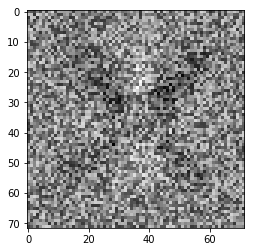

In [25]:
plt.imshow(im1.reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')

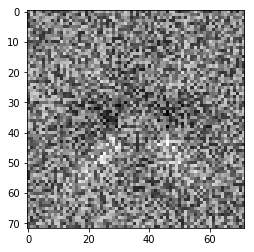

In [26]:
plt.imshow(im2.reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')


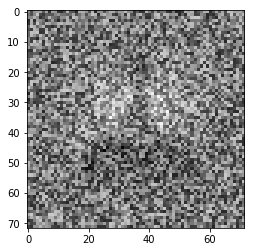

In [27]:
plt.imshow(im3.reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')

In [28]:
sgd_model.get_weights()

[array([[ 0.03724766,  0.01924447,  0.02477845],
        [ 0.00645842,  0.04888671,  0.02200105],
        [ 0.01196199,  0.03652655, -0.04053261],
        ...,
        [-0.01359534, -0.03810437,  0.00933933],
        [ 0.01580741, -0.0411742 ,  0.01690636],
        [ 0.01901834,  0.03860384,  0.015507  ]], dtype=float32),
 array([ 0.00060897, -0.00042909, -0.00017988], dtype=float32)]

In [29]:
sgd_Viz=sgd_model.get_weights()[0]
im1=sgd_Viz[:,0]
im2=sgd_Viz[:,1]
im3=sgd_Viz[:,2]


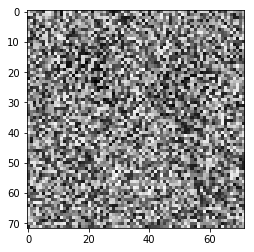

In [30]:
plt.imshow(im1.reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')


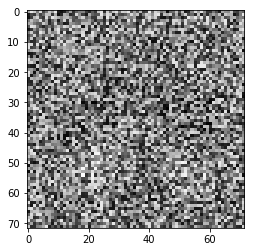

In [31]:
plt.imshow(im2.reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')


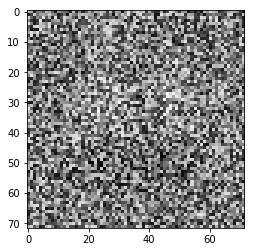

In [32]:
plt.imshow(im3.reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')

# 5. A More Difficult Classification Problem

In [33]:
[X_train, Y_train] = generate_dataset_classification(300, 20, True)
Y_train_cat2=to_categorical(Y_train)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [34]:
X_train.shape, Y_train_cat2.shape

((300, 5184), (300, 3))

In [35]:
sgd_model.fit(X_train, Y_train_cat2, epochs=20, validation_split=0.2)


Train on 240 samples, validate on 60 samples
Epoch 1/20
240/240 [==============================] - 0s 227us/step - loss: 1.4266 - acc: 0.3792 - val_loss: 1.4186 - val_acc: 0.3667
Epoch 2/20
240/240 [==============================] - 0s 200us/step - loss: 1.5171 - acc: 0.3542 - val_loss: 1.6280 - val_acc: 0.4000
Epoch 3/20
240/240 [==============================] - 0s 200us/step - loss: 1.3751 - acc: 0.4292 - val_loss: 1.3766 - val_acc: 0.4500
Epoch 4/20
240/240 [==============================] - 0s 195us/step - loss: 1.2413 - acc: 0.4292 - val_loss: 1.6713 - val_acc: 0.5000
Epoch 5/20
240/240 [==============================] - 0s 209us/step - loss: 1.2829 - acc: 0.4167 - val_loss: 1.1220 - val_acc: 0.4000
Epoch 6/20
240/240 [==============================] - 0s 195us/step - loss: 1.1355 - acc: 0.4583 - val_loss: 1.4924 - val_acc: 0.4167
Epoch 7/20
240/240 [==============================] - 0s 184us/step - loss: 1.1409 - acc: 0.4833 - val_loss: 1.1409 - val_acc: 0.3833
Epoch 8/20
240/24

In [36]:
adam_model.fit(X_train, Y_train_cat2, batch_size=32, epochs=25, validation_split=0.2)


Train on 240 samples, validate on 60 samples
Epoch 1/25
240/240 [==============================] - 0s 218us/step - loss: 2.0670 - acc: 0.3875 - val_loss: 2.2392 - val_acc: 0.5000
Epoch 2/25
240/240 [==============================] - 0s 197us/step - loss: 1.9358 - acc: 0.3875 - val_loss: 1.3652 - val_acc: 0.4667
Epoch 3/25
240/240 [==============================] - 0s 195us/step - loss: 1.3604 - acc: 0.4500 - val_loss: 1.3863 - val_acc: 0.3000
Epoch 4/25
240/240 [==============================] - 0s 197us/step - loss: 1.3168 - acc: 0.4250 - val_loss: 1.0870 - val_acc: 0.5333
Epoch 5/25
240/240 [==============================] - 0s 200us/step - loss: 1.2544 - acc: 0.5042 - val_loss: 1.2206 - val_acc: 0.5333
Epoch 6/25
240/240 [==============================] - 0s 204us/step - loss: 1.0381 - acc: 0.5208 - val_loss: 1.0895 - val_acc: 0.5167
Epoch 7/25
240/240 [==============================] - 0s 193us/step - loss: 0.8751 - acc: 0.5875 - val_loss: 1.1011 - val_acc: 0.5167
Epoch 8/25
240/24

evaluate our classifier on this test

In [37]:
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [38]:
X_test.shape, Y_test.shape

((300, 5184), (300, 3))

In [39]:
sgd_model.evaluate(X_test, Y_test)


300/300 [==============================] - 0s 110us/step


[0.944938637415568, 0.5566666666666666]

0.55% our model is not accurate 

In [40]:
adam_model.evaluate(X_test, Y_test)


300/300 [==============================] - 0s 98us/step


[0.9222819542884827, 0.5999999992052714]

Reshape X_train

In [41]:
X_train_rs = X_train.reshape(X_train.shape[0], 72, 72, 1) # 72*72= n_cols

In [42]:
X_train_rs.shape, Y_train_cat2.shape

((300, 72, 72, 1), (300, 3))

In [43]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten 
from keras.layers import Dropout

sgd_model2 = Sequential()
sgd_model2.add(Conv2D(16,(5,5), input_shape=(72,72,1))) # 72*72= n_cols
sgd_model2.add(Activation('relu'))
sgd_model2.add(MaxPooling2D(pool_size=(2,2)))
sgd_model2.add(Flatten())
sgd_model2.add(Dense(64, activation='relu'))
sgd_model2.add(Dense(3, activation='softmax'))


In [44]:
adam_model2 = Sequential()
adam_model2.add(Conv2D(16,(5,5), input_shape=(72,72,1))) # 72*72= n_cols
adam_model2.add(Activation('relu'))
adam_model2.add(MaxPooling2D(pool_size=(2,2)))
adam_model2.add(Flatten())
adam_model2.add(Dense(64, activation='relu'))
adam_model2.add(Dense(3, activation='softmax'))


In [45]:
#Model with gradient Descent optimizer:           
sgd_model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics = ['accuracy'])
#Model with Adam optimizer:
adam_model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [46]:
adam_model2.fit(X_train_rs, Y_train_cat2, batch_size = 100, epochs = 10,validation_split=0.2)


Train on 240 samples, validate on 60 samples
Epoch 1/10
240/240 [==============================] - 4s 18ms/step - loss: 1.2597 - acc: 0.3625 - val_loss: 1.0951 - val_acc: 0.2667
Epoch 2/10
240/240 [==============================] - 3s 14ms/step - loss: 1.1226 - acc: 0.3125 - val_loss: 1.1329 - val_acc: 0.2667
Epoch 3/10
240/240 [==============================] - 3s 14ms/step - loss: 1.0566 - acc: 0.3333 - val_loss: 1.0020 - val_acc: 0.4833
Epoch 4/10
240/240 [==============================] - 3s 14ms/step - loss: 0.9538 - acc: 0.7000 - val_loss: 0.9349 - val_acc: 0.6167
Epoch 5/10
240/240 [==============================] - 3s 14ms/step - loss: 0.9204 - acc: 0.6000 - val_loss: 0.9129 - val_acc: 0.6167
Epoch 6/10
240/240 [==============================] - 3s 14ms/step - loss: 0.8781 - acc: 0.6208 - val_loss: 0.8980 - val_acc: 0.6333
Epoch 7/10
240/240 [==============================] - 3s 14ms/step - loss: 0.8620 - acc: 0.6292 - val_loss: 0.8683 - val_acc: 0.6500
Epoch 8/10
240/240 [====

In [47]:
sgd_model2.fit(X_train_rs, Y_train_cat2, batch_size = 100, epochs = 10, validation_split=0.2)


Train on 240 samples, validate on 60 samples
Epoch 1/10
240/240 [==============================] - 4s 15ms/step - loss: 1.1115 - acc: 0.2542 - val_loss: 1.0888 - val_acc: 0.4333
Epoch 2/10
240/240 [==============================] - 3s 13ms/step - loss: 1.0949 - acc: 0.3625 - val_loss: 1.0776 - val_acc: 0.4333
Epoch 3/10
240/240 [==============================] - 3s 13ms/step - loss: 1.0911 - acc: 0.3875 - val_loss: 1.0718 - val_acc: 0.4333
Epoch 4/10
240/240 [==============================] - 3s 13ms/step - loss: 1.0872 - acc: 0.3792 - val_loss: 1.0708 - val_acc: 0.4333
Epoch 5/10
240/240 [==============================] - 3s 14ms/step - loss: 1.0834 - acc: 0.3917 - val_loss: 1.0700 - val_acc: 0.4833
Epoch 6/10
240/240 [==============================] - 3s 13ms/step - loss: 1.0812 - acc: 0.4125 - val_loss: 1.0664 - val_acc: 0.4500
Epoch 7/10
240/240 [==============================] - 3s 13ms/step - loss: 1.0788 - acc: 0.4167 - val_loss: 1.0650 - val_acc: 0.4667
Epoch 8/10
240/240 [====

In [48]:
sgd_model2.evaluate(X_train_rs, Y_train_cat2)


300/300 [==============================] - 2s 6ms/step


[1.0674328311284382, 0.43666666666666665]

In [49]:
sgd_model2.evaluate(X_test.reshape(X_test.shape[0], 72, 72, 1), Y_test)


300/300 [==============================] - 2s 5ms/step


[1.0816040738423665, 0.3666666658719381]

In [50]:
adam_model2.evaluate(X_train_rs, Y_train_cat2)


300/300 [==============================] - 2s 5ms/step


[0.68059330701828, 0.7599999992052714]

In [51]:
adam_model2.evaluate(X_test.reshape(X_test.shape[0], 72, 72, 1), Y_test)


300/300 [==============================] - 2s 5ms/step


[0.8162846604983012, 0.6433333333333333]

good accuracy for the second model 

# 6. Regression Problem

In [52]:
[X_train, Y_train] = generate_dataset_regression(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [53]:
[X_test, Y_test] = generate_test_set_regression()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [54]:

from sklearn import preprocessing
Y_train_norm = preprocessing.normalize(Y_train, norm='l2')
Y_test_norm = preprocessing.normalize(Y_test, norm='l2')

In [55]:
X_train.shape , Y_train.shape ,X_test.shape , Y_test.shape ,Y_train_norm.shape,Y_test_norm.shape

((300, 5184), (300, 6), (300, 5184), (300, 6), (300, 6), (300, 6))

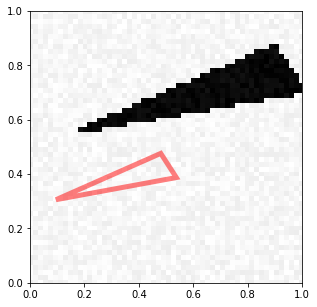

In [56]:
visualize_prediction(X_train[1],Y_train_norm[1])

In [57]:
X_train_rs2 = X_train.reshape(X_train.shape[0],72,72,1)
X_test_rs2 = X_test.reshape(X_test.shape[0],72,72,1)

In [58]:
model_adam_fin = Sequential()
# The Input Layer :
model_adam_fin.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(72,72,1)))
model_adam_fin.add(MaxPooling2D(pool_size=(2, 2)))
model_adam_fin.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model_adam_fin.add(MaxPooling2D(pool_size=(2, 2)))
model_adam_fin.add(Flatten())
model_adam_fin.add(Dense(64, kernel_initializer='normal', activation='relu'))

In [59]:
# The Output Layer :
model_adam_fin.add(Dense(6, kernel_initializer='normal',activation='linear'))
model_adam_fin.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [60]:
model_adam_fin.fit(X_train.reshape((300, 72, 72, 1)), Y_train_norm, epochs=20, batch_size=32,validation_split=0.2)

Train on 240 samples, validate on 60 samples
Epoch 1/20
240/240 [==============================] - 13s 54ms/step - loss: 4.5669 - acc: 0.1333 - val_loss: 3.8659 - val_acc: 0.1000
Epoch 2/20
240/240 [==============================] - 12s 51ms/step - loss: 3.8076 - acc: 0.2042 - val_loss: 3.8697 - val_acc: 0.1333
Epoch 3/20
240/240 [==============================] - 12s 51ms/step - loss: 3.8005 - acc: 0.2250 - val_loss: 3.8471 - val_acc: 0.1500
Epoch 4/20
240/240 [==============================] - 12s 51ms/step - loss: 3.7933 - acc: 0.2000 - val_loss: 3.8407 - val_acc: 0.1833
Epoch 5/20
240/240 [==============================] - 12s 51ms/step - loss: 3.7906 - acc: 0.2167 - val_loss: 3.8388 - val_acc: 0.1833
Epoch 6/20
240/240 [==============================] - 12s 51ms/step - loss: 3.7845 - acc: 0.3458 - val_loss: 3.8373 - val_acc: 0.2333
Epoch 7/20
240/240 [==============================] - 12s 51ms/step - loss: 3.7756 - acc: 0.3250 - val_loss: 3.8276 - val_acc: 0.2667
Epoch 8/20
240/24

In [61]:
model_adam_fin.evaluate(X_train.reshape((300, 72, 72, 1)), Y_train_norm)

300/300 [==============================] - 5s 15ms/step


[3.7141549396514892, 0.39333333293596906]

In [62]:
model_adam_fin.evaluate(X_test.reshape((300, 72, 72, 1)), Y_test_norm)

300/300 [==============================] - 5s 15ms/step


[3.817732594807943, 0.2300000003973643]

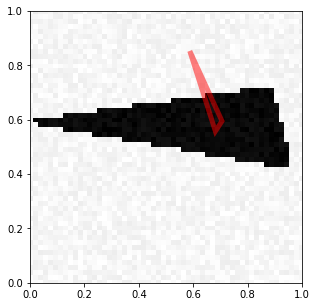

In [63]:
visualize_prediction(X_test[30],model_adam_fin.predict(X_test[30].reshape(1,72,72,1)))
#visualize_prediction(X_train[8],Y_train_norm[8])


# 7 . Image Denoising

In [64]:
from keras.layers import UpSampling2D

In [65]:
def generate_a_drawing_denoise(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize, figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0, figsize)
    ax.set_ylim(0, figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[
        ::3].astype(np.float32)
    imdatan = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdatan, imdata

In [66]:
def generate_a_rectangle_denoise(noise=0.0, free_location=False):
    figsize = 1.0
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize / 2 + side / 2
        bottom = figsize / 2 - side / 2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing_denoise(figsize, U, V, noise)

In [67]:
def generate_a_triangle_denoise(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random()) * figsize / 2
        middle = figsize / 2
        U = (middle, middle + size, middle - size)
        V = (middle + size, middle - size, middle - size)
    imdatan, imdata = generate_a_drawing_denoise(figsize, U, V, noise)
    return [imdatan,imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

In [68]:
def generate_a_disk_denoise(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize / 2, figsize / 2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize / 2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2 * np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing_denoise(figsize, U, V, noise)

In [69]:
def generate_dataset_denoise(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle_denoise()[0].shape[0]
    X = np.zeros([nb_samples, im_size])
    Y = np.zeros([nb_samples, im_size])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 100 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i], Y[i] = generate_a_rectangle_denoise(noise, free_location)
        elif category == 1:
            X[i],Y[i] = generate_a_disk_denoise(noise, free_location)
        else:
            [X[i],Y[i], V] = generate_a_triangle_denoise(noise, free_location)
    X = (X + noise) / (255 + 2 * noise)
    Y = Y/255
    return [X, Y]

In [70]:
[X_train8,Y_train8]=generate_dataset_denoise(500,20,True)


Creating data:
0
100
200
300
400


In [71]:
Y_train_rs3 = Y_train8.reshape(Y_train8.shape[0],72,72,1)
X_train_rs3 = X_train8.reshape(X_train8.shape[0],72,72,1)

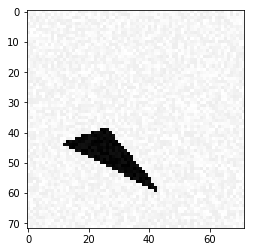

In [72]:
plt.imshow(X_train_rs3[100].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')

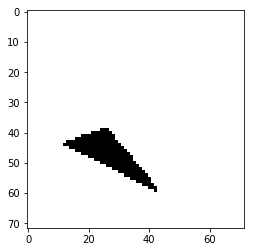

In [73]:
plt.imshow(Y_train_rs3[100].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')

In [74]:
model_den = Sequential()

In [75]:
model_den.add(Conv2D(32,(3, 3), activation='relu',padding = 'same' ,input_shape=(72,72,1)))
model_den.add(MaxPooling2D(pool_size=(2, 2)))
model_den.add(Conv2D(32,(3,3), activation = 'relu', padding = 'same'))
model_den.add(MaxPooling2D(pool_size=(2,2)))

model_den.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding = 'same'))
model_den.add(UpSampling2D(size=(2, 2)))
model_den.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding = 'same'))
model_den.add(UpSampling2D(size=(2, 2)))
model_den.add(Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding = 'same'))

In [76]:
#model_den.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model_den.compile(optimizer='adadelta',loss='binary_crossentropy',metrics=['accuracy'])

In [77]:
model_den.fit(X_train_rs3, Y_train_rs3, epochs=6, batch_size=64)

Epoch 1/6
500/500 [==============================] - 49s 99ms/step - loss: 0.3869 - acc: 0.9052
Epoch 2/6
500/500 [==============================] - 48s 96ms/step - loss: 0.2043 - acc: 0.9087
Epoch 3/6
500/500 [==============================] - 48s 97ms/step - loss: 0.1574 - acc: 0.9381
Epoch 4/6
500/500 [==============================] - 50s 100ms/step - loss: 0.1149 - acc: 0.9697
Epoch 5/6
500/500 [==============================] - 54s 108ms/step - loss: 0.0646 - acc: 0.9815
Epoch 6/6
500/500 [==============================] - 58s 115ms/step - loss: 0.0529 - acc: 0.9814


In [78]:
model_den.evaluate(X_train_rs3, Y_train_rs3)

500/500 [==============================] - 18s 37ms/step


[0.03987540769577026, 0.9845555515289307]

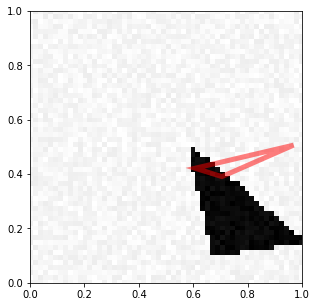

In [79]:
visualize_prediction(X_train_rs3[9],model_adam_fin.predict(X_train_rs3[9].reshape(1,72,72,1)))